In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyswarms.single import GlobalBestPSO
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters import plot_contour
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define the objective functions
def three_hump_camel(position):
    x, y = position[:, 0], position[:, 1]
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2

def easom(position):
    x, y = position[:, 0], position[:, 1]
    return -np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)

def levi_n13(position):
    x, y = position[:, 0], position[:, 1]
    return np.sin(3 * np.pi * x)**2 + ((x - 1)**2 * (1 + np.sin(3 * np.pi * y)**2)) + ((y - 1)**2 * (1 + np.sin(2 * np.pi * y)**2))

def holder_table(position):
    x, y = position[:, 0], position[:, 1]
    return -np.abs(np.sin(x) * np.cos(y) * np.exp(np.abs(1 - (np.sqrt(x**2 + y**2) / np.pi))))

def beale(position):
    x, y = position[:, 0], position[:, 1]
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

def matyas(position):
    x, y = position[:, 0], position[:, 1]
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

def goldstein_price(position):
    x, y = position[:, 0], position[:, 1]
    return (1 + ((x + y + 1)**2) * (19 - 14 * x + 3 * x**2 - 14 * y + 6 * x * y + 3 * y**2)) * \
           (30 + ((2 * x - 3 * y)**2) * (18 - 32 * x + 12 * x**2 + 48 * y - 36 * x * y + 27 * y**2))

def ackley(position):
    x, y = position[:, 0], position[:, 1]
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def rastrigin(position):
    x, y = position[:, 0], position[:, 1]
    return 10 * 2 + (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y))

def sphere(position):
    x, y = position[:, 0], position[:, 1]
    return x**2 + y**2

functions = [
    easom, three_hump_camel, levi_n13, holder_table, beale,
    matyas, goldstein_price, ackley, rastrigin, sphere
]

function_names = [
    "Easom", "3-Hump Camel", "Levi N.13", "Holder Table", "Beale",
    "Matyas", "Goldstein-Price", "Ackley", "Rastrigin", "Sphere"
]

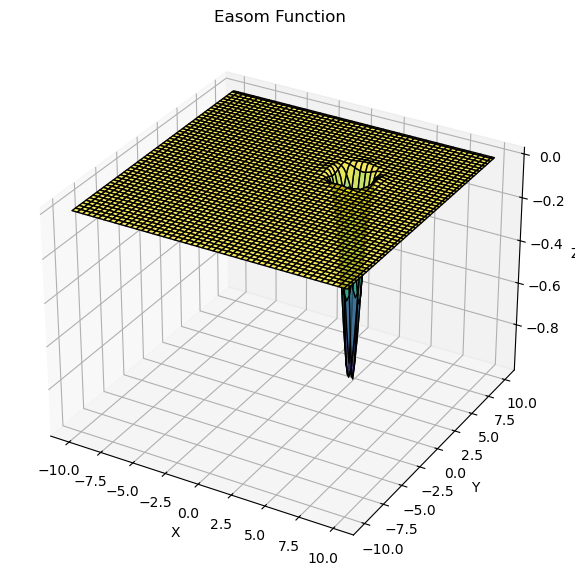

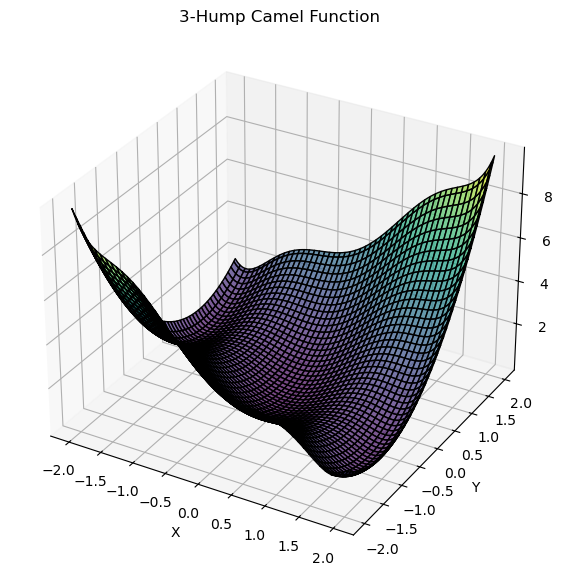

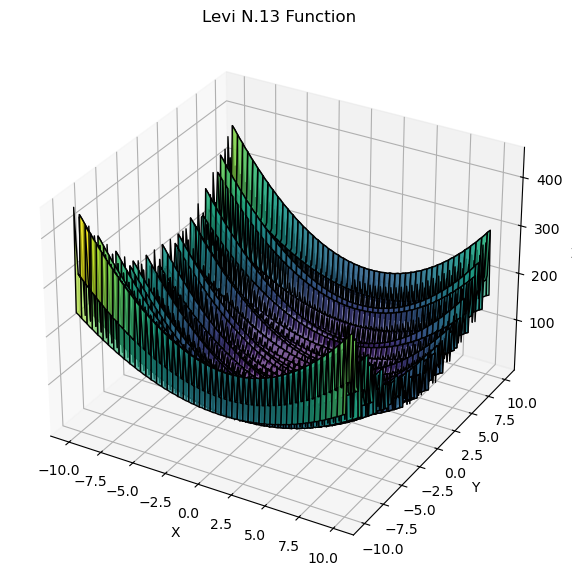

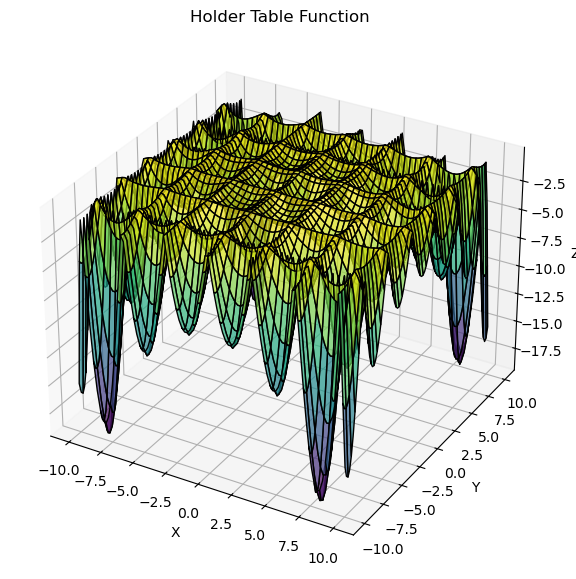

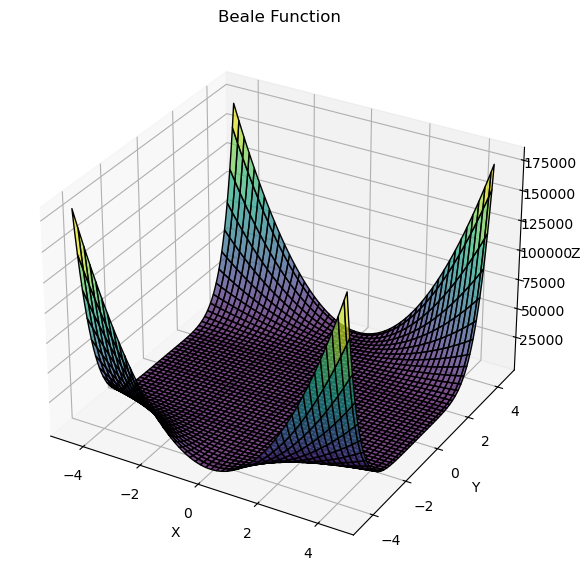

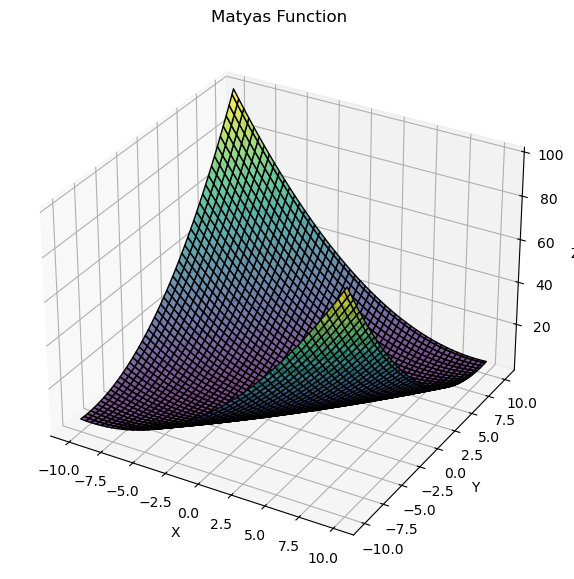

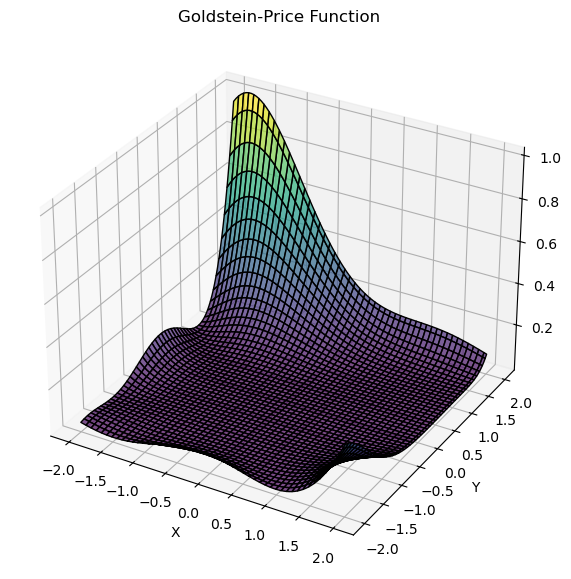

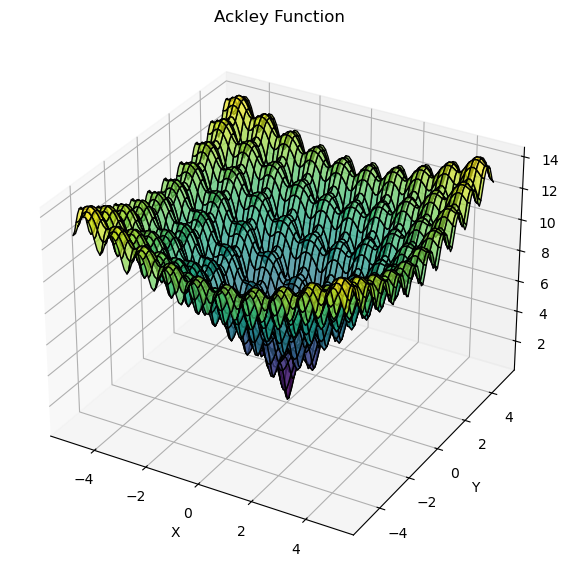

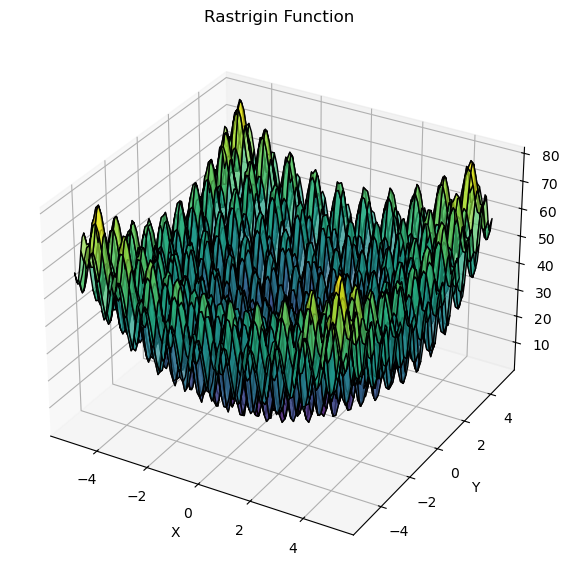

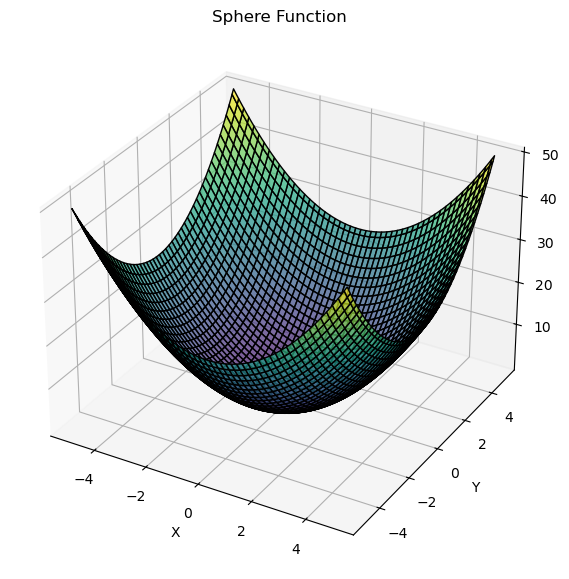

In [3]:
def plot_function_surface(func, func_name, x_range=(-10, 10), y_range=(-10, 10), resolution=100):
    x = np.linspace(*x_range, resolution)
    y = np.linspace(*y_range, resolution)
    X, Y = np.meshgrid(x, y)
    positions = np.column_stack([X.ravel(), Y.ravel()])  # Flatten X, Y to pass as positions
    
    Z = func(positions).reshape(X.shape)  # Reshape the output to match X, Y grid

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)
    ax.set_title(f'{func_name} Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.savefig(f'plots/{func_name}_viz.png')
    plt.show()

# Plot each function with ranges suited to each function's properties
plot_ranges = [
    ((-10, 10), (-10, 10)),   # Easom
    ((-2, 2), (-2, 2)),       # 3-Hump Camel
    ((-10, 10), (-10, 10)),   # Levi N.13
    ((-10, 10), (-10, 10)),   # Holder Table
    ((-4.5, 4.5), (-4.5, 4.5)),  # Beale
    ((-10, 10), (-10, 10)),   # Matyas
    ((-2, 2), (-2, 2)),       # Goldstein-Price
    ((-5, 5), (-5, 5)),       # Ackley
    ((-5.12, 5.12), (-5.12, 5.12)),  # Rastrigin
    ((-5, 5), (-5, 5))        # Sphere
]

for func, func_name, plot_range in zip(functions, function_names, plot_ranges):
    plot_function_surface(func, func_name, *plot_range, resolution=100)

In [4]:
# Define the parameter grid
c1_values = [round(i, 1) for i in np.arange(0.2, 1.1, 0.2)]
c2_values = [round(i, 1) for i in np.arange(0.2, 1.1, 0.2)]
w_values = [round(i, 1) for i in np.arange(0.2, 1.1, 0.2)]
num_iter_values = [50, 100, 250, 500]
num_particles_values = [50, 100, 250, 500]

# Bounds for the PSO search space
bounds = ([-10, -10], [10, 10])

# Initialize list to store the results
results = []

# Run PSO for each combination of parameters using itertools.product
for i, func in enumerate(functions):
    for (c1, c2, w, num_iters, num_particles) in itertools.product(c1_values, c2_values, w_values, num_iter_values, num_particles_values):
        # Define the options with the current set of parameters
        options = {'c1': c1, 'c2': c2, 'w': w}
        
        # Initialize the PSO optimizer
        optimizer = GlobalBestPSO(n_particles=num_particles, dimensions=2, options=options, bounds=bounds)
        
        # Run the optimizer and capture the best cost
        cost, pos = optimizer.optimize(func, iters=num_iters, verbose=False)
        
        # Store the configuration and corresponding cost
        results.append({
            "function": function_names[i],
            "c1": c1,
            "c2": c2,
            "w": w,
            "iterations": num_iters,
            "particles": num_particles,
            "best_cost": cost
        })

        # Output the results for this run
        print(f"Function: {function_names[i]}, Config (c1={c1}, c2={c2}, w={w}, iters={num_iters}, particles={num_particles}) -> Best Cost: {cost}")

# Find the best configuration per function
for func_name in function_names:
    func_results = [res for res in results if res["function"] == func_name]
    best_result = min(func_results, key=lambda x: x["best_cost"])
    
    print(f"\nBest configuration for {func_name}:")
    print(f"c1 = {best_result['c1']}, c2 = {best_result['c2']}, w = {best_result['w']}, "
          f"iterations = {best_result['iterations']}, particles = {best_result['particles']}")
    print(f"Best cost: {best_result['best_cost']}")

Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=50) -> Best Cost: -0.9999878094842396
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=100) -> Best Cost: -0.999996083481984
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=250) -> Best Cost: -0.9999969218636832
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=500) -> Best Cost: -0.9999996170234078
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=50) -> Best Cost: -0.9999999996868667
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=100) -> Best Cost: -0.9999999999915243
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=250) -> Best Cost: -0.9999999999983844
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=500) -> Best Cost: -0.9999999999989683
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, iters=250, particles=50) -> Best Cost: -1.0
Function: Easom, Config (c1=0.2, c2=0.2, w=0.2, ite

In [5]:
import pandas as pd
df = pd.DataFrame(results)
print(df.info())
print(df.head())

2024-11-20 08:32:50,718 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   function    20000 non-null  object 
 1   c1          20000 non-null  float64
 2   c2          20000 non-null  float64
 3   w           20000 non-null  float64
 4   iterations  20000 non-null  int64  
 5   particles   20000 non-null  int64  
 6   best_cost   20000 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.1+ MB
None
  function   c1   c2    w  iterations  particles  best_cost
0    Easom  0.2  0.2  0.2          50         50  -0.999988
1    Easom  0.2  0.2  0.2          50        100  -0.999996
2    Easom  0.2  0.2  0.2          50        250  -0.999997
3    Easom  0.2  0.2  0.2          50        500  -1.000000
4    Easom  0.2  0.2  0.2         100         50  -1.000000


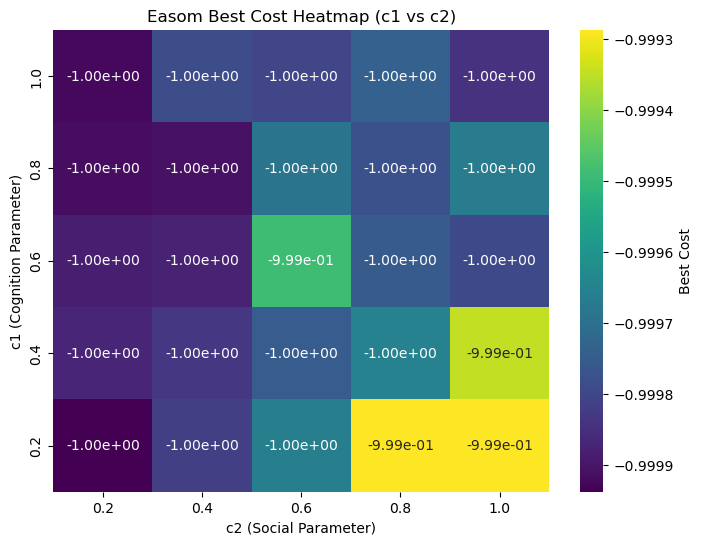

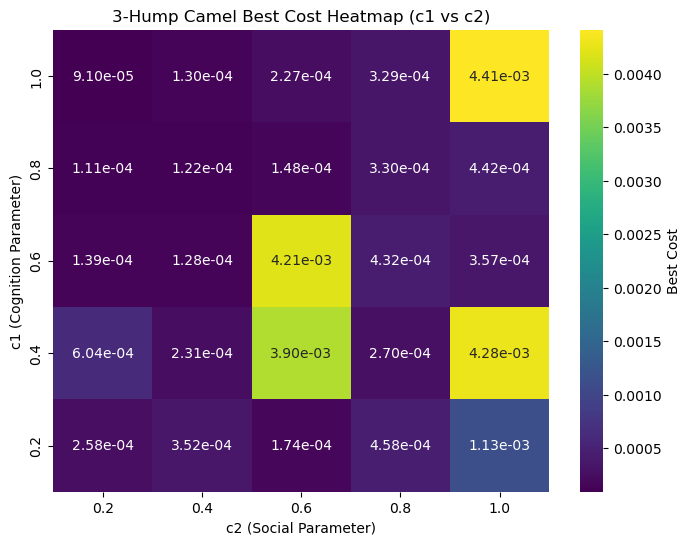

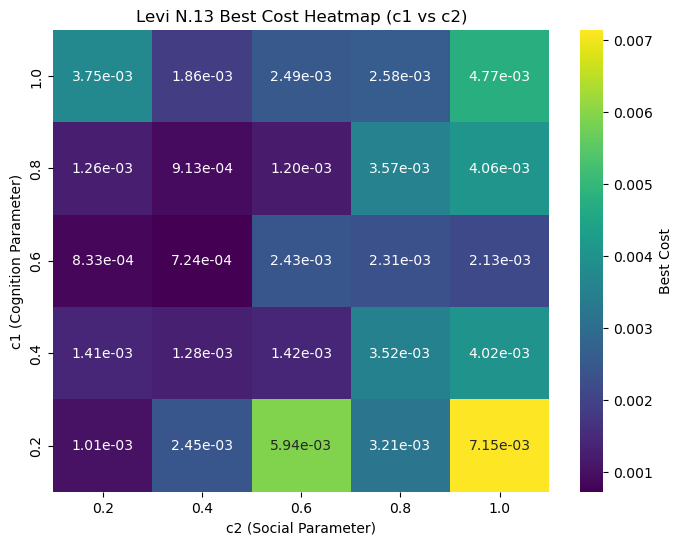

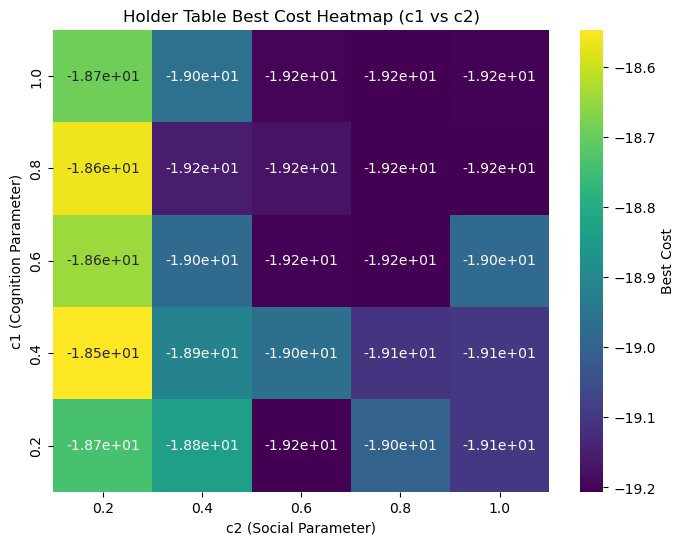

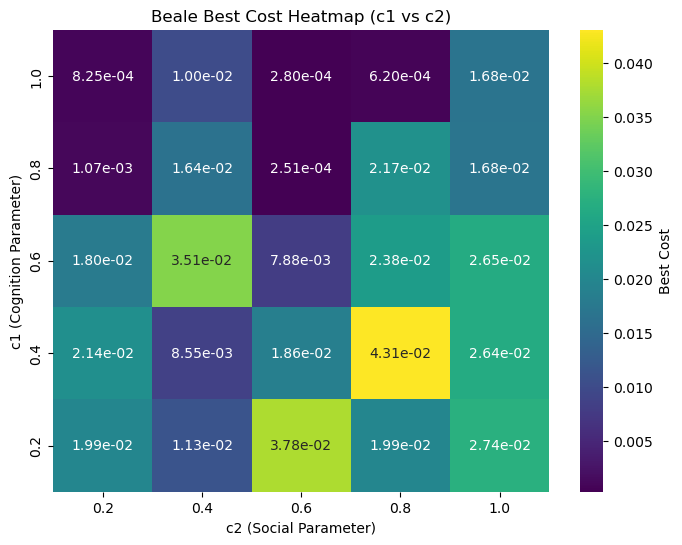

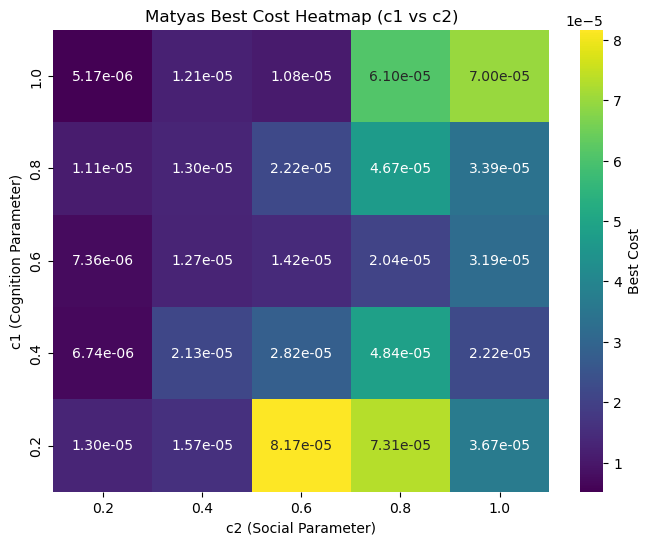

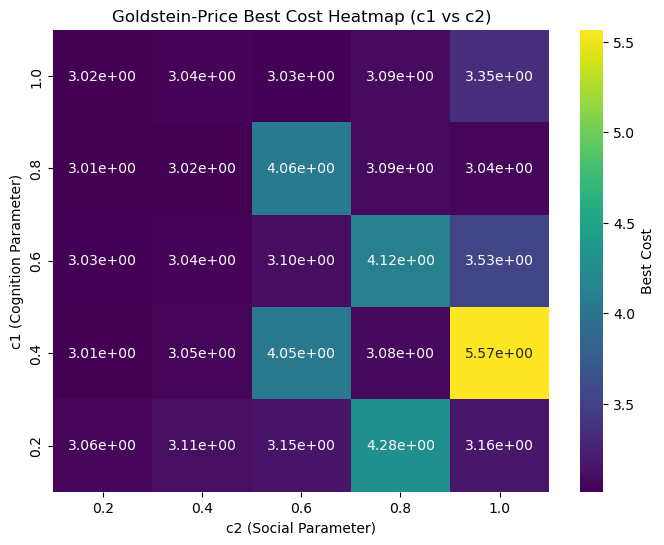

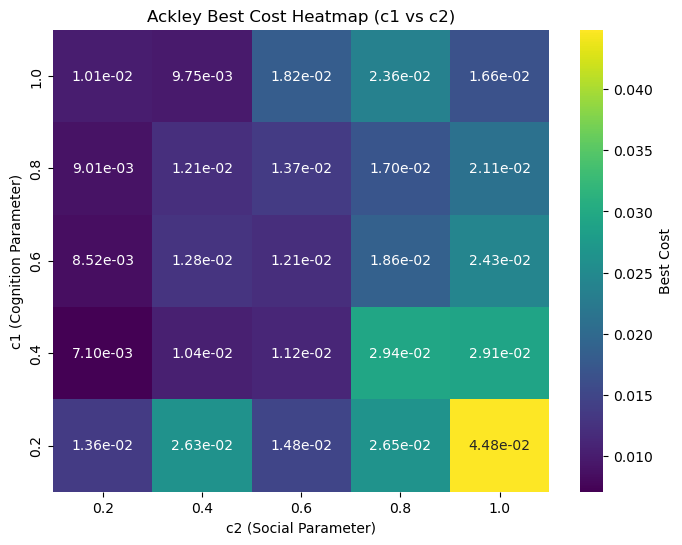

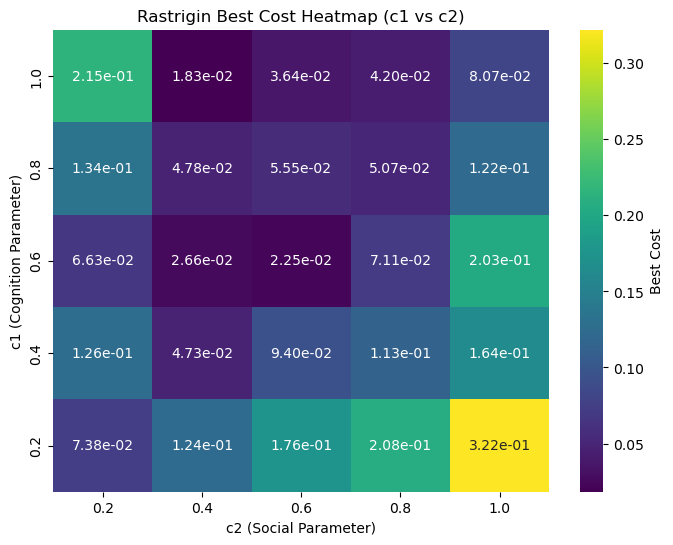

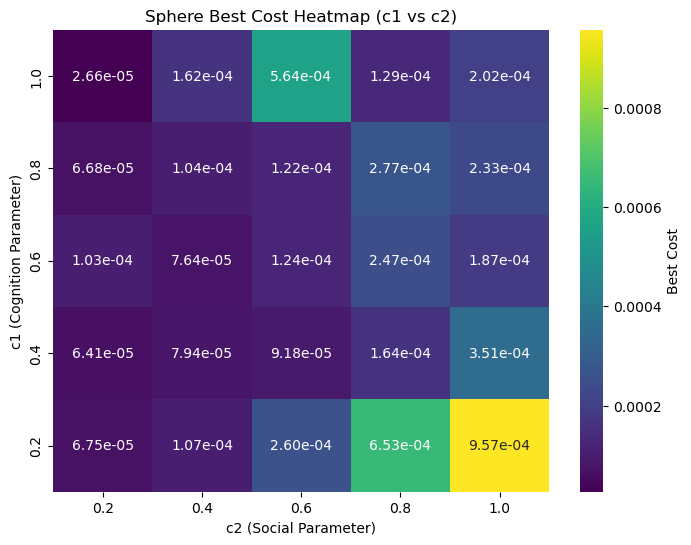

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Create a heatmap for each function
for func_name in function_names:
    # Filter results for the specific function
    func_df = df_results[df_results['function'] == func_name]
    
    # Pivot the DataFrame to have c1 and c2 as indices and best_cost as values
    heatmap_data = func_df.pivot_table(values='best_cost', index='c1', columns='c2')
    heatmap_data = heatmap_data[::-1]

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Best Cost'})
    plt.title(f"{func_name} Best Cost Heatmap (c1 vs c2)")
    plt.xlabel('c2 (Social Parameter)')
    plt.ylabel('c1 (Cognition Parameter)')
    plt.savefig(f'plots/{func_name}_heatmap_c1_c2.png')
    plt.show()

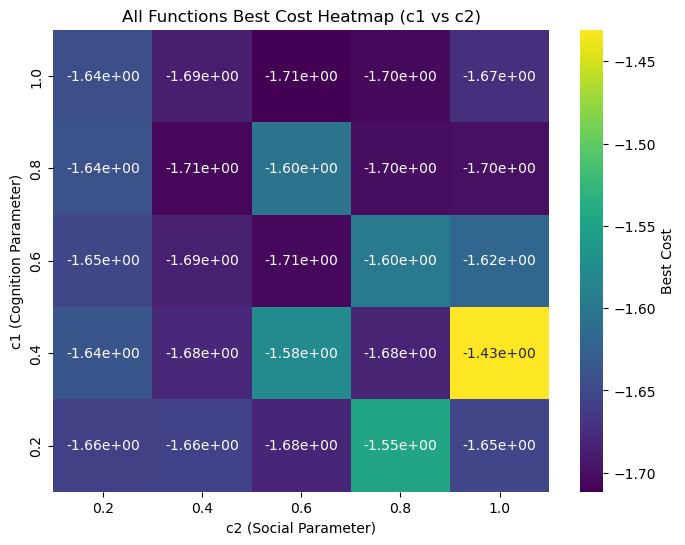

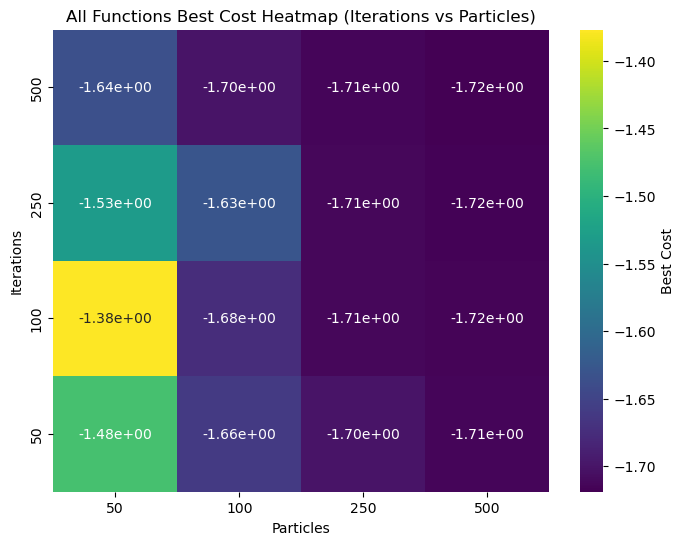

In [11]:
# Pivot the DataFrame to have c1 and c2 as indices and best_cost as values
heatmap_data = df_results.pivot_table(values='best_cost', index='c1', columns='c2')
heatmap_data = heatmap_data[::-1]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Best Cost'})
plt.title(f"All Functions Best Cost Heatmap (c1 vs c2)")
plt.xlabel('c2 (Social Parameter)')
plt.ylabel('c1 (Cognition Parameter)')
plt.savefig(f'plots/all_heatmap_c1_c2.png')
plt.show()

# Pivot the DataFrame to have c1 and c2 as indices and best_cost as values
heatmap_data = df_results.pivot_table(values='best_cost', index='iterations', columns='particles')
heatmap_data = heatmap_data[::-1]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Best Cost'})
plt.title(f"All Functions Best Cost Heatmap (Iterations vs Particles)")
plt.xlabel('Particles')
plt.ylabel('Iterations')
plt.savefig(f'plots/all_heatmap_iter_part.png')
plt.show()

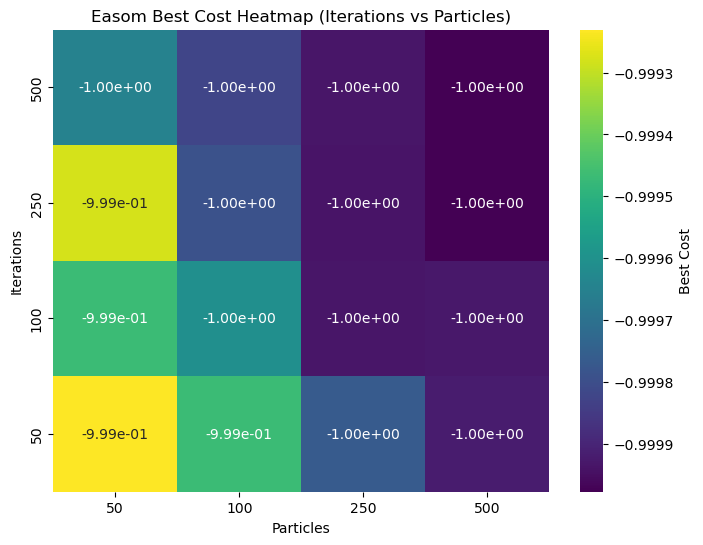

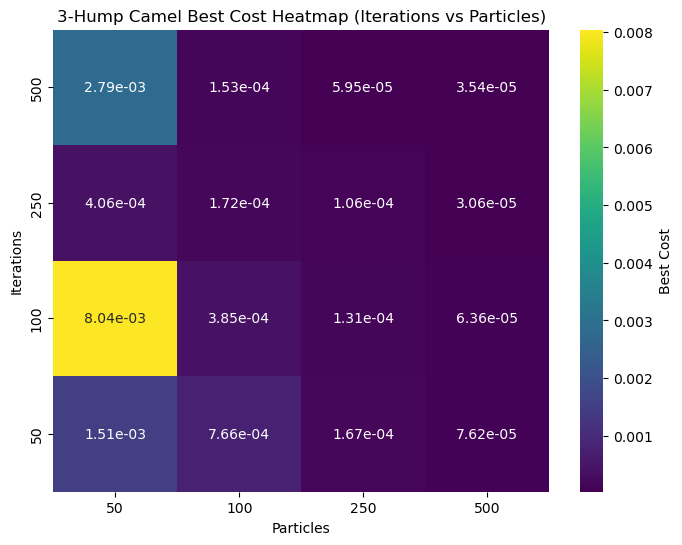

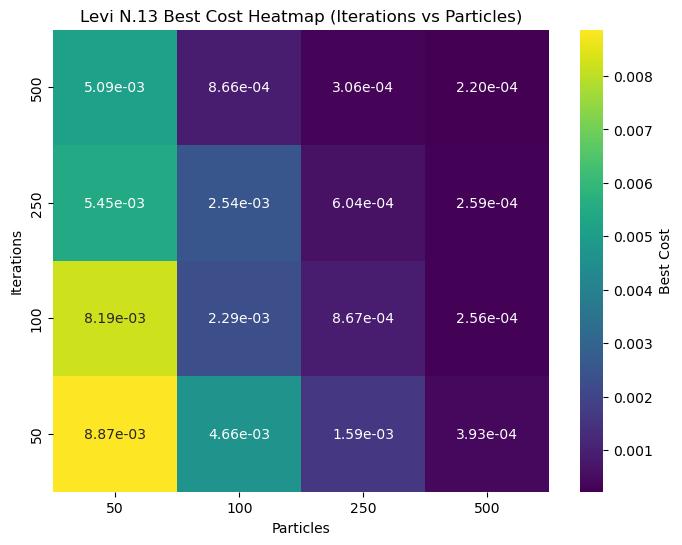

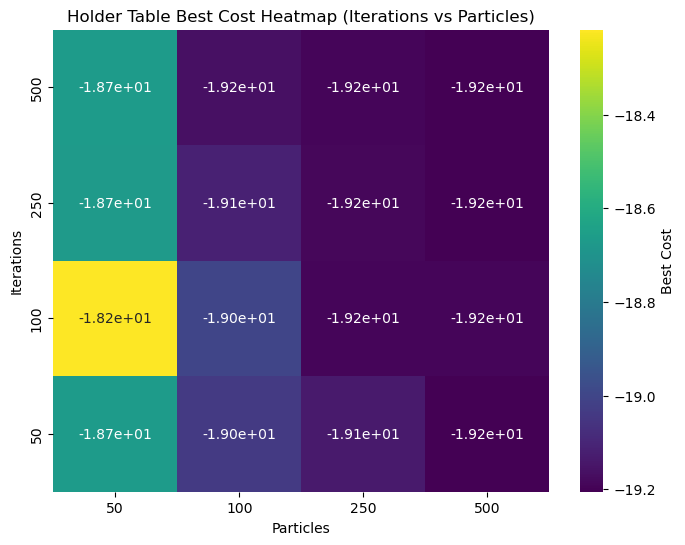

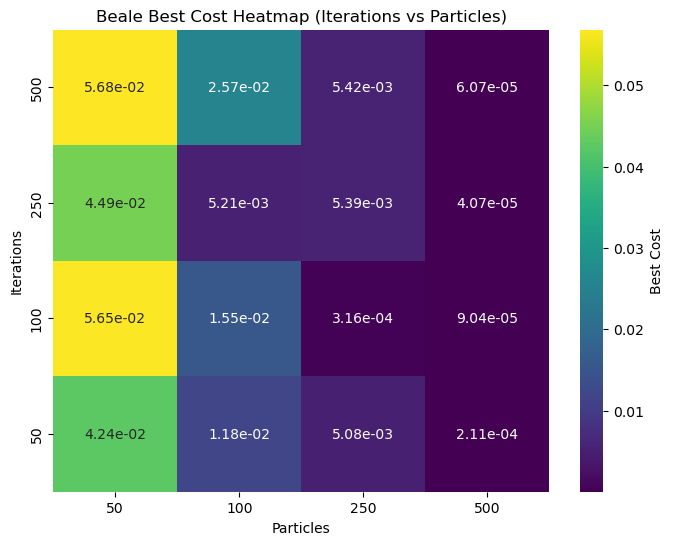

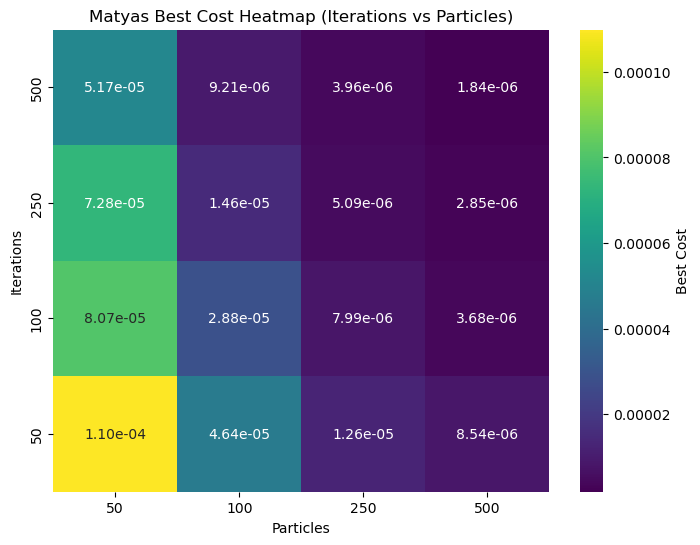

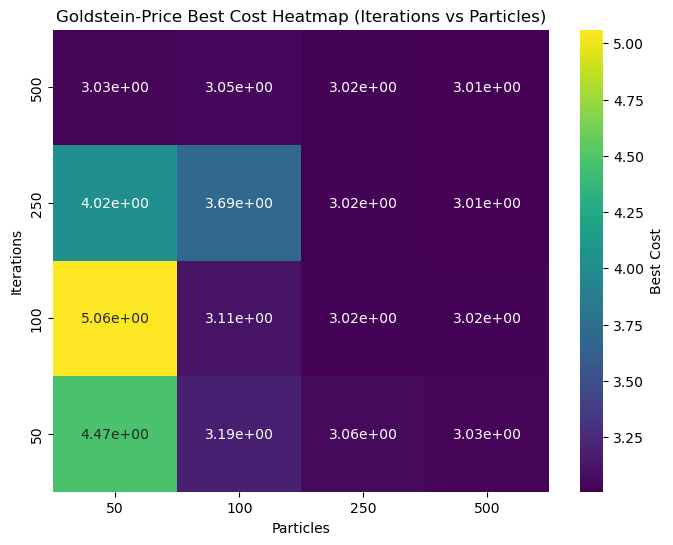

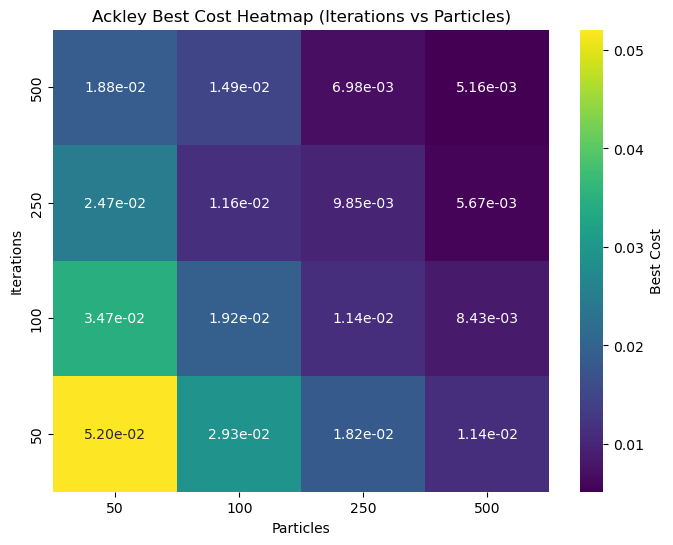

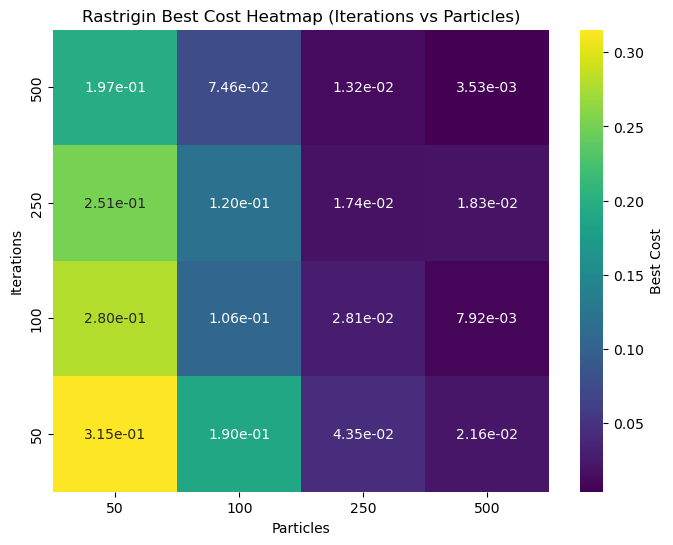

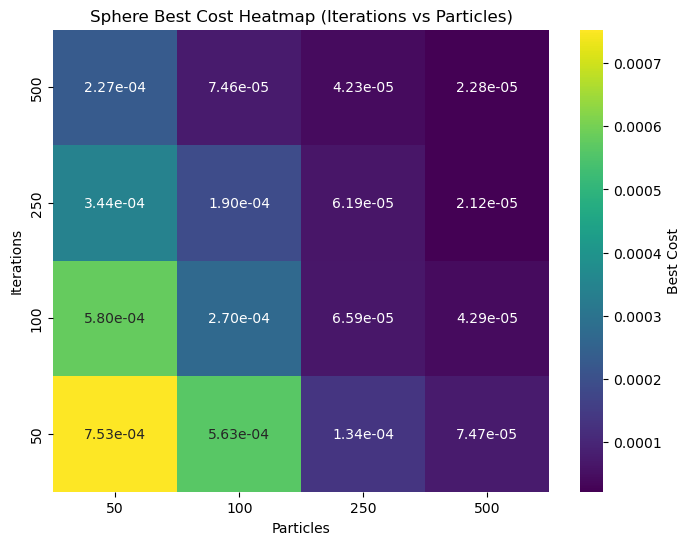

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Create a heatmap for each function
for func_name in function_names:
    # Filter results for the specific function
    func_df = df_results[df_results['function'] == func_name]
    
    # Pivot the DataFrame to have c1 and c2 as indices and best_cost as values
    heatmap_data = func_df.pivot_table(values='best_cost', index='iterations', columns='particles')
    heatmap_data = heatmap_data[::-1]

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Best Cost'})
    plt.title(f"{func_name} Best Cost Heatmap (Iterations vs Particles)")
    plt.xlabel('Particles')
    plt.ylabel('Iterations')
    plt.savefig(f'plots/{func_name}_heatmap_iter_part.png')
    plt.show()